# Mapping Guide IDs between labs
This notebook describes the current guide annotations provided by the Hon and Huangfu labs, and creates a master list of guide IDs to use for downstream analysis

# Set-up

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# Paths: TODO update if necessary
path_huanfu_guide_ref = "/cellar/users/aklie/data/datasets/tf_perturb_seq/ref/Huangfu_ref_feature.csv"
path_hon_guide_ref = "/cellar/users/aklie/data/datasets/tf_perturb_seq/ref/Hon_sgRNA_index_dacc_annot_reference.csv"
path_non_targeting = "/cellar/users/aklie/data/datasets/tf_perturb_seq/ref/non_targeting.tsv"
path_negative_controls = "/cellar/users/aklie/data/datasets/tf_perturb_seq/ref/negative_controls.tsv"
path_positive_controls = "/cellar/users/aklie/data/datasets/tf_perturb_seq/ref/positive_controls.tsv"
path_targets = "/cellar/users/aklie/data/datasets/tf_perturb_seq/ref/target_genes.tsv"

# Load in auxiliary data

In [3]:
# Load in the reference files
negative_controls = pd.read_csv(path_negative_controls, sep="\t")
positive_controls = pd.read_csv(path_positive_controls, sep="\t")
non_targeting = pd.read_csv(path_non_targeting, sep="\t")
targets = pd.read_csv(path_targets, sep="\t")
print(f"Loaded {len(negative_controls)} negative controls, {len(positive_controls)} positive controls, {len(non_targeting)} non-targeting guides, and {len(targets)} targets.")

Loaded 100 negative controls, 19 positive controls, 600 non-targeting guides, and 2210 targets.


In [4]:
# Get a list of genes for negative controls
negative_control_genes = negative_controls["Gene"].values

In [5]:
# Get a list of photospacers for negative controls
negative_control_guide_photospacers = negative_controls[['Photospacer 1', 'Photospacer 2', 'Photospacer 3', 'Photospacer 4', 'Photospacer 5', 'Photospacer 6']].values.flatten()
negative_control_guide_photospacers = [str(x).upper() for x in negative_control_guide_photospacers]

In [6]:
# Get a list of genes for positive controls
positive_control_genes = positive_controls["Gene"].str.split(" ").str[0].values
positive_control_genes

array(['CD81', 'CD81', 'CD151', 'CD151', 'CD55', 'CD29', 'B2M', 'AARS',
       'AARS', 'AARS', 'POLR1D', 'POLR1D', 'POLR1D', 'DNAJC19', 'DNAJC19',
       'DNAJC19', 'MALAT1', 'NGFRAP1', 'TFRC'], dtype=object)

In [7]:
# Get non-targeting guide IDs
non_targeting_ids = non_targeting["Unnamed: 0"].values

# Huangfu annotations

In [163]:
# Read Huangfu lab guide reference
huangfu_guide_ref = pd.read_csv(path_huanfu_guide_ref)
print(f"Total guides in Huangfu lab reference: {huangfu_guide_ref.shape[0]}")

Total guides in Huangfu lab reference: 14364


In [164]:
# Describe the dataframes
hon_guide_ref.describe()

,protospacer_ID,protospacer,intended_target_name,type,genomic_element,reverse_compliment,protospacer_upper
count,14358,14358,14358,14358,14358,14358,14358
unique,14358,14358,2087,4,1,14358,14358
top,DNAJC19_ B,GGGAACTCCTGTAAGGTCAG,non-targeting,targeting,promoter,CTGACCTTACAGGAGTTCCC,GGGAACTCCTGTAAGGTCAG
freq,1,1,600,13141,14358,1,1


In [165]:
# how many ids start with non-targeting
huangfu_guide_ref["id"].str.startswith("non-targeting").sum()

600

In [167]:
# are these the same as the non_targeting_ids?
non_targeting_ids_in_huangfu = huangfu_guide_ref[huangfu_guide_ref["id"].isin(non_targeting_ids)]
print(f"Non-targeting guides in Huangfu reference: {non_targeting_ids_in_huangfu.shape[0]}")
non_targeting_match = non_targeting_ids_in_huangfu["id"].isin(non_targeting_ids)
print(f"Do non-targeting guides match? {non_targeting_match.all()}")

Non-targeting guides in Huangfu reference: 600
Do non-targeting guides match? True


In [168]:
# Get a target column representing the gene target (if targeting)
huangfu_guide_ref["target"] = huangfu_guide_ref["id"].str.split("|").str[0].str.split("_").str[0]
huangfu_guide_ref["target"].value_counts().iloc[:25]

target
non-targeting    600
ESRRG             30
FOXP1             21
SOX6              18
ZNF83             18
HIVEP3            16
ZNF718            16
NFIC              12
NFE2L2            12
NFATC2            12
NFATC1            12
NFIX              12
NOBOX             12
MYCN              12
MKX               12
MITF              12
NOTCH1            12
MYRF              12
ESR1              12
NR4A2             12
MIER1             12
MEIS3             12
LMO1              12
LIN54             12
LHX6              12
Name: count, dtype: int64

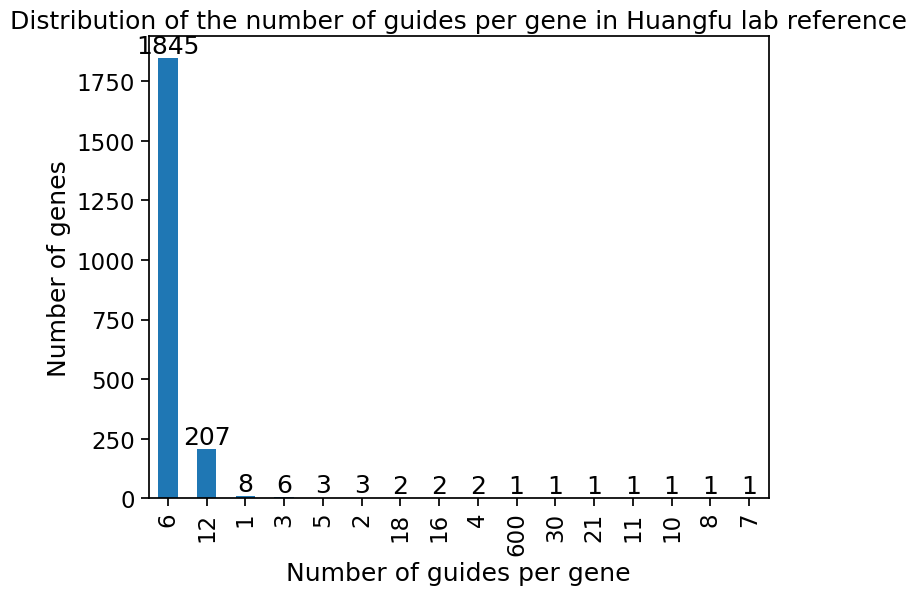

In [169]:
# Plot a 
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 6))
    huangfu_guide_ref["target"].value_counts().value_counts().plot(kind='bar')
    # put numbers above bars
    for i, v in enumerate(huangfu_guide_ref["target"].value_counts().value_counts()):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    plt.xlabel("Number of guides per gene")
    plt.ylabel("Number of genes")
    plt.title("Distribution of the number of guides per gene in Huangfu lab reference")
    plt.show()

In [170]:
# How many guides target a gene in the negative control list? Should be 600 (we have 100 targets with 6 guides each)
huangfu_guide_ref["target"].isin(negative_control_genes).sum()

598

In [171]:
# how many ids start with "OR", should ideally be same as above
huangfu_guide_ref["id"].str.startswith("OR").sum()

598

In [172]:
# Are these two the same?
negative_control_ids_in_huangfu = huangfu_guide_ref[huangfu_guide_ref["target"].isin(negative_control_genes)]
print(f"Negative control guides in Huangfu reference: {negative_control_ids_in_huangfu.shape[0]}")
negative_control_match = negative_control_ids_in_huangfu["target"].isin(negative_control_genes)
print(f"Do negative control guides match? {negative_control_match.all()}")

Negative control guides in Huangfu reference: 598
Do negative control guides match? True


In [173]:
# Are we missing any negative control genes? Or are there just some missing guides
set(negative_control_genes).difference(huangfu_guide_ref["target"])

set()

In [174]:
# How many photospacers are in the negative control list?
len(negative_control_guide_photospacers)

600

In [175]:
# What is the difference
set(negative_control_guide_photospacers) - set(huangfu_guide_ref[huangfu_guide_ref["target"].isin(negative_control_genes)]["sequence"].values)

set()

In [176]:
# Are their photospacers in the negative control list that are repeated?
len(negative_control_guide_photospacers), len(set(negative_control_guide_photospacers))

(600, 598)

In [177]:
# Which negative_control_guide_photospacers are repeated
pd.Series(negative_control_guide_photospacers).value_counts()

GGGCATCCCAACCAAGAAGA    2
GCCTATGGTTCATGAGGACA    2
GTTTGTGACTAAGTTTATTC    1
GCCAATTTATATGAGATTGG    1
GTCTCCAATTTATATGAGAT    1
                       ..
GTCGTCTGAAGAGTCCCATG    1
GAGTTGGATTTCATCCTCAT    1
GTGACCACACTAAGTAGAGC    1
GCATCCAGCTCTACTTAGTG    1
GAATGTGGCTATCTTGATGT    1
Name: count, Length: 598, dtype: int64

In [178]:
# What about positive controls, should have 19?
huangfu_guide_ref["target"].isin(positive_control_genes).sum()

18

In [179]:
# What's the difference
set(positive_control_genes).difference(huangfu_guide_ref["target"])

{'CD29'}

In [180]:
# Is it becuase CD29 is called ITGB1
huangfu_guide_ref[huangfu_guide_ref["id"] == "ITGB1"]

,id,name,read,pattern,sequence,feature_type,target
5,ITGB1,ITGB1,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GAGAGGCCCAGCGGGAGTCG,Custom,ITGB1


In [181]:
# add ITGB1 to positive control list
if "ITGB1" not in positive_control_genes:
    positive_control_genes = np.append(positive_control_genes, "ITGB1")
len(positive_control_genes)

20

In [182]:
# What about positive controls, should have 19?
huangfu_guide_ref["target"].isin(positive_control_genes).sum()

19

In [183]:
# Final thing: annotated types of guides
# 1. If it starts with "non-targeting", it's a non-targeting guide
# 2. If it starts with "OR", it's a negative control
# 3. If its in the positive control list, it's a positive control
# 4. Otherwise its a targeting guide
def annotate_guide_type_huangfu(row):
    if row["id"].startswith("non-targeting"):
        return "non_targeting"
    elif row["id"].startswith("OR"):
        return "negative_control"
    elif row["target"] in positive_control_genes:
        return "positive_control"
    else:
        return "targeting"
    
huangfu_guide_ref["type"] = huangfu_guide_ref.apply(annotate_guide_type_huangfu, axis=1)
guide_type_counts = huangfu_guide_ref["type"].value_counts()
print(guide_type_counts)

type
targeting           13147
non_targeting         600
negative_control      598
positive_control       19
Name: count, dtype: int64


# Hon annotations

In [184]:
# Read Hon lab guide reference
hon_guide_ref = pd.read_csv(path_hon_guide_ref, sep="\t")
hon_guide_ref["protospacer_upper"] = hon_guide_ref["protospacer"].str.upper()  # create protospacer_upper column
print(f"Total guides in Hon lab reference: {hon_guide_ref.shape[0]}")

Total guides in Hon lab reference: 14358


In [185]:
# Describe the dataframes
hon_guide_ref.describe()

,protospacer_ID,protospacer,intended_target_name,type,genomic_element,reverse_compliment,protospacer_upper
count,14358,14358,14358,14358,14358,14358,14358
unique,14358,14358,2087,2,1,14358,14358
top,DNAJC19_ B,GGGAACTCCTGTAAGGTCAG,non-targeting,targeting,promoter,CTGACCTTACAGGAGTTCCC,GGGAACTCCTGTAAGGTCAG
freq,1,1,600,13758,14358,1,1


In [186]:
#. Check the types of guides in the Hon lab reference
hon_guide_ref["type"].value_counts()

type
targeting        13758
non-targeting      600
Name: count, dtype: int64

In [187]:
# how many ids start with non-targeting
hon_guide_ref["protospacer_ID"].str.startswith("non-targeting").sum()

600

In [188]:
# are these the same as the non_targeting_ids?
non_targeting_ids_in_hon = hon_guide_ref[hon_guide_ref["protospacer_ID"].isin(non_targeting_ids)]
print(f"Non-targeting guides in hon reference: {non_targeting_ids_in_hon.shape[0]}")
non_targeting_match = non_targeting_ids_in_hon["protospacer_ID"].isin(non_targeting_ids)
print(f"Do non-targeting guides match? {non_targeting_match.all()}")

Non-targeting guides in hon reference: 600
Do non-targeting guides match? True


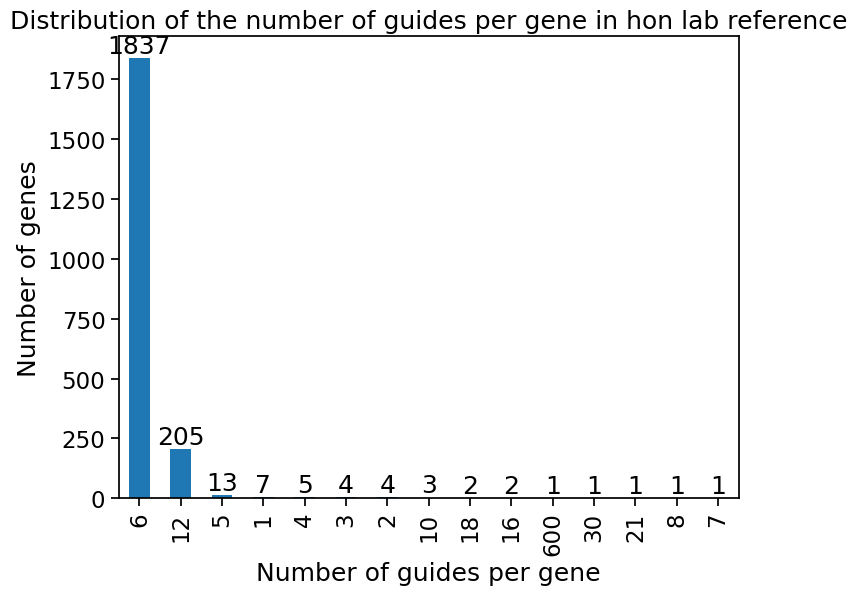

In [189]:
# Plot a 
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 6))
    hon_guide_ref["intended_target_name"].value_counts().value_counts().plot(kind='bar')
    # put numbers above bars
    for i, v in enumerate(hon_guide_ref["intended_target_name"].value_counts().value_counts()):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    plt.xlabel("Number of guides per gene")
    plt.ylabel("Number of genes")
    plt.title("Distribution of the number of guides per gene in hon lab reference")
    plt.show()

In [190]:
# How many guides target a gene in the negative control list? Should be 600 (we have 100 targets with 6 guides each)
hon_guide_ref["intended_target_name"].isin(negative_control_genes).sum()

598

In [191]:
# how many ids start with "OR", should ideally be same as above
hon_guide_ref["intended_target_name"].str.startswith("OR").sum()

598

In [192]:
# Are these two the same?
negative_control_ids_in_hon = hon_guide_ref[hon_guide_ref["intended_target_name"].isin(negative_control_genes)]
print(f"Negative control guides in Hon reference: {negative_control_ids_in_hon.shape[0]}")
negative_control_match = negative_control_ids_in_hon["intended_target_name"].isin(negative_control_genes)
print(f"Do negative control guides match? {negative_control_match.all()}")

Negative control guides in Hon reference: 598
Do negative control guides match? True


In [193]:
# Are we missing any negative control genes? Or are there just some missing guides
set(negative_control_genes).difference(hon_guide_ref["intended_target_name"])

set()

In [194]:
# How many photospacers are in the negative control list?
len(negative_control_guide_photospacers)

600

In [195]:
# What is the difference
set(negative_control_guide_photospacers) - set(hon_guide_ref[hon_guide_ref["intended_target_name"].isin(negative_control_genes)]["protospacer_upper"].values)

set()

In [196]:
# Are their photospacers in the negative control list that are repeated?
len(negative_control_guide_photospacers), len(set(negative_control_guide_photospacers))

(600, 598)

In [197]:
# Which negative_control_guide_photospacers are repeated
pd.Series(negative_control_guide_photospacers).value_counts()

GGGCATCCCAACCAAGAAGA    2
GCCTATGGTTCATGAGGACA    2
GTTTGTGACTAAGTTTATTC    1
GCCAATTTATATGAGATTGG    1
GTCTCCAATTTATATGAGAT    1
                       ..
GTCGTCTGAAGAGTCCCATG    1
GAGTTGGATTTCATCCTCAT    1
GTGACCACACTAAGTAGAGC    1
GCATCCAGCTCTACTTAGTG    1
GAATGTGGCTATCTTGATGT    1
Name: count, Length: 598, dtype: int64

In [198]:
# What about positive controls, should have 19?
hon_guide_ref["intended_target_name"].isin(positive_control_genes).sum()

19

In [199]:
# What's the difference
set(positive_control_genes).difference(hon_guide_ref["intended_target_name"])

{'ITGB1'}

In [200]:
# Is it becuase CD29 is called ITGB1
hon_guide_ref[hon_guide_ref["protospacer_ID"] == "ITGB1"]

,protospacer_ID,protospacer,intended_target_name,type,genomic_element,reverse_compliment,protospacer_upper


In [201]:
# add ITGB1 to positive control list
if "ITGB1" not in positive_control_genes:
    positive_control_genes = np.append(positive_control_genes, "ITGB1")
len(positive_control_genes)

20

In [202]:
# What about positive controls, should have 19?
hon_guide_ref["intended_target_name"].isin(positive_control_genes).sum()

19

In [203]:
# Final thing: annotated types of guides
# 1. If it starts with "non-targeting", it's a non-targeting guide
# 2. If it starts with "OR", it's a negative control
# 3. If its in the positive control list, it's a positive control
# 4. Otherwise its a targeting guide
def annotate_guide_type_hon(row):
    if row["protospacer_ID"].startswith("non-targeting"):
        return "non_targeting"
    elif row["protospacer_ID"].startswith("OR"):
        return "negative_control"
    elif row["intended_target_name"] in positive_control_genes:
        return "positive_control"
    else:
        return "targeting"
    
hon_guide_ref["type"] = hon_guide_ref.apply(annotate_guide_type_hon, axis=1)
guide_type_counts = hon_guide_ref["type"].value_counts()
print(guide_type_counts)

type
targeting           13141
non_targeting         600
negative_control      598
positive_control       19
Name: count, dtype: int64


# Create master guide reference

In [204]:
# How many map
hon_guide_ref["protospacer"].str.upper().isin(huangfu_guide_ref["sequence"]).sum()

14358

In [205]:
# merge
ref = pd.merge(
    hon_guide_ref,
    huangfu_guide_ref,
    left_on="protospacer_upper",
    right_on="sequence",
    how="outer",
    suffixes=("_hon", "_huangfu")
)
ref

,protospacer_ID,protospacer,intended_target_name,type_hon,genomic_element,reverse_compliment,protospacer_upper,id,name,read,pattern,sequence,feature_type,target,type_huangfu
0,OR5K2-2,GAAAAAATTGTAGAGGAATA,OR5K2,negative_control,promoter,TATTCCTCTACAATTTTTTC,GAAAAAATTGTAGAGGAATA,OR5K2_2,OR5K2,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GAAAAAATTGTAGAGGAATA,Custom,OR5K2,negative_control
1,SP1_+_53773993.23-P1P2-1,GAAAAACGCGGACGCTGACG,SP1,targeting,promoter,CGTCAGCGTCCGCGTTTTTC,GAAAAACGCGGACGCTGACG,SP1_1,SP1,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GAAAAACGCGGACGCTGACG,Custom,SP1,targeting
2,SP8_-_20826141.23-P1P2-2,GAAAAAGATCCTCTGAGAGG,SP8,targeting,promoter,CCTCTCAGAGGATCTTTTTC,GAAAAAGATCCTCTGAGAGG,SP8_4,SP8,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GAAAAAGATCCTCTGAGAGG,Custom,SP8,targeting
3,FOXN3_-_89883583.23-P2-1,GAAAAAGGCGACACATGACC,FOXN3,targeting,promoter,GGTCATGTGTCGCCTTTTTC,GAAAAAGGCGACACATGACC,FOXN3_P2_3,FOXN3_P2,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GAAAAAGGCGACACATGACC,Custom,FOXN3,targeting
4,ZNF85_+_21106076.23-P1P2-1,GAAAACAAGACCTAGAGCTC,ZNF85,targeting,promoter,GAGCTCTAGGTCTTGTTTTC,GAAAACAAGACCTAGAGCTC,ZNF85_3,ZNF85,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GAAAACAAGACCTAGAGCTC,Custom,ZNF85,targeting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14359,SH3D19_-_152147401.23-P2-2,GTTTTGAGCTGAGTAATCTG,SH3D19,targeting,promoter,CAGATTACTCAGCTCAAAAC,GTTTTGAGCTGAGTAATCTG,SH3D19_P2_4,SH3D19_P2,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GTTTTGAGCTGAGTAATCTG,Custom,SH3D19,targeting
14360,ZNF532_-_56532303.23-P1-2,GTTTTGGCTGCCATGAAGGG,ZNF532,targeting,promoter,CCCTTCATGGCAGCCAAAAC,GTTTTGGCTGCCATGAAGGG,ZNF532_P1_4,ZNF532_P1,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GTTTTGGCTGCCATGAAGGG,Custom,ZNF532,targeting
14361,ZNF829_-_37406927.23-P1P2-2,GTTTTGGTCCCCAGGAGAAC,ZNF829,targeting,promoter,GTTCTCCTGGGGACCAAAAC,GTTTTGGTCCCCAGGAGAAC,ZNF829_4,ZNF829,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GTTTTGGTCCCCAGGAGAAC,Custom,ZNF829,targeting
14362,NANOG_+_7942459.23-P1P2-2,GTTTTTCCATTATAACTTGG,NANOG,targeting,promoter,CCAAGTTATAATGGAAAAAC,GTTTTTCCATTATAACTTGG,NANOG_6,NANOG,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GTTTTTCCATTATAACTTGG,Custom,NANOG,targeting


In [206]:
# Are there any types that don't match
(ref["type_hon"] != ref["type_huangfu"]).sum()

6

In [207]:
# which are these
ref[(ref["type_hon"] != ref["type_huangfu"])]

,protospacer_ID,protospacer,intended_target_name,type_hon,genomic_element,reverse_compliment,protospacer_upper,id,name,read,pattern,sequence,feature_type,target,type_huangfu
2221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GATA6_TSS_6,GATA6_TSS,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GAGTCAAGGCCATCCACGGT,Custom,GATA6,targeting
3405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GATA6_TSS_1,GATA6_TSS,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GCAGGGGCCCGCGACGAGTA,Custom,GATA6,targeting
3417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GATA6_TSS_3,GATA6_TSS,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GCAGGGTCCGGCCGCCTACG,Custom,GATA6,targeting
4868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GATA6_TSS_2,GATA6_TSS,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GCGACGGGTTAACAAGAGCG,Custom,GATA6,targeting
6882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GATA6_TSS_4,GATA6_TSS,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GCTTATTGATCTCCACGCCC,Custom,GATA6,targeting
11203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GATA6_TSS_5,GATA6_TSS,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GGGTATGGTAGGAGATCGAC,Custom,GATA6,targeting


In [ ]:
# clean
cols_to_keep = hon_guide_ref.columns
cols_to_keep = [col for col in cols_to_keep if col not in ['protospacer_upper', 'type']]
ref_clean = ref[list(cols_to_keep) + ["id", "name", "type_huangfu"]]
ref_clean = ref_clean.rename(columns={"id": "Huangfu_id", "name": "Huangfu_name", "type_huangfu": "type"})
ref_clean.head()

,protospacer_ID,protospacer,intended_target_name,genomic_element,reverse_compliment,Huangfu_id,Huangfu_name,type
0,OR5K2-2,GAAAAAATTGTAGAGGAATA,OR5K2,promoter,TATTCCTCTACAATTTTTTC,OR5K2_2,OR5K2,negative_control
1,SP1_+_53773993.23-P1P2-1,GAAAAACGCGGACGCTGACG,SP1,promoter,CGTCAGCGTCCGCGTTTTTC,SP1_1,SP1,targeting
2,SP8_-_20826141.23-P1P2-2,GAAAAAGATCCTCTGAGAGG,SP8,promoter,CCTCTCAGAGGATCTTTTTC,SP8_4,SP8,targeting
3,FOXN3_-_89883583.23-P2-1,GAAAAAGGCGACACATGACC,FOXN3,promoter,GGTCATGTGTCGCCTTTTTC,FOXN3_P2_3,FOXN3_P2,targeting
4,ZNF85_+_21106076.23-P1P2-1,GAAAACAAGACCTAGAGCTC,ZNF85,promoter,GAGCTCTAGGTCTTGTTTTC,ZNF85_3,ZNF85,targeting


In [211]:
# save
ref_clean.to_csv(
    "/cellar/users/aklie/data/datasets/tf_perturb_seq/ref/sgRNA_id_master.tsv",
    sep="\t",
    index=False,
    header=True,
)

# DONE!

---